# Decision Tree

Decision trees, one of the simplest and yet most useful Machine Learning structures. Decision trees, as the name implies, are trees of decisions.

![tree](1.jpg)

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

### Types of Decision Trees

Types of decision trees are based on the type of target variable we have. It can be of two types:

* Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.
* Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

### Terminologies related to Decision Trees

* **Root Node**: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting**: It is a process of dividing a node into two or more sub-nodes.
* **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
* **Leaf / Terminal Node**: Nodes do not split is called Leaf or Terminal node.
* **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
* **Branch / Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.
* **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

![Tree_Structure](2.png)

## Decision Tree Algorithm

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria are different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on the type of target variables. Let us look at some algorithms used in Decision Trees:

* ID3: (extension of D3)
* C4.5: (successor of ID3)
* CART: (Classification And Regression Tree)
* CHAID: (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)
* MARS: (multivariate adaptive regression splines)

The ID3 algorithm builds decision trees using a top-down greedy search approach through the space of possible branches with no backtracking. A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment.

### Steps in ID3 algorithm:

- It begins with the original set S as the root node.
- On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.
- It then selects the attribute which has the smallest Entropy or Largest Information gain.
- The set S is then split by the selected attribute to produce a subset of the data.
- The algorithm continues to recur on each subset, considering only attributes never selected before.

# Decision Tree With Python

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


###  Exploratory Data Analysis

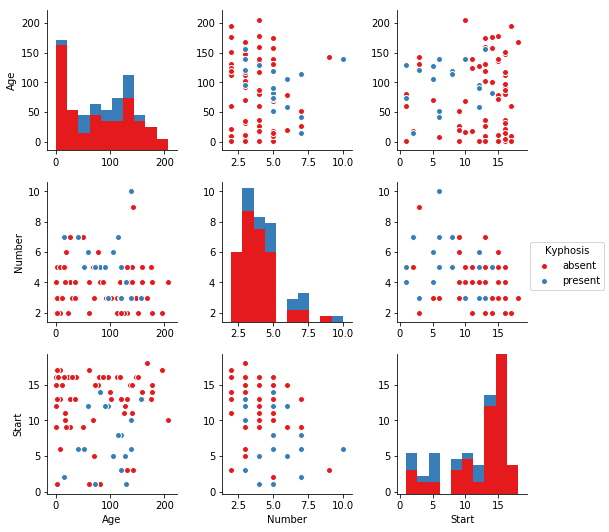

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

### Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Evaluation And Prediction

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.77      1.00      0.87        17
    present       1.00      0.38      0.55         8

avg / total       0.85      0.80      0.77        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[17  0]
 [ 5  3]]


### Tree Visualization

The best thing in Scikit-learn that it has some built-in visualization capabilities for decision trees.

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

ModuleNotFoundError: No module named 'pydot'

In [16]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

NameError: name 'features' is not defined